In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

CLIENTNUM: Номер клиента. Уникальный идентификатор клиента, владеющего счетом.

Attrition_Flag: Внутреннее событие (активность клиента) - если счет закрыт, то "Потерянный клиент", в противном случае "Существующий клиент".

Customer_Age: Возраст в годах.

Gender: Пол владельца счета.

Dependent_count: Количество иждивенцев.

Education_Level: Образовательная квалификация владельца счета - Выпускник, Средняя школа, Неизвестно, Необразованный, Студент колледжа (относится к студенту колледжа), Послевузовское, Докторская степень.

Marital_Status: Семейное положение владельца счета.

Income_Category: Годовая категория дохода владельца счета.

Card_Category: Тип карты.

Months_on_book: Период отношений с банком.

Total_Relationship_Count: Общее количество продуктов, удерживаемых клиентом.

Months_Inactive_12_mon: Количество месяцев бездействия за последние 12 месяцев.

Contacts_Count_12_mon: Количество контактов между клиентом и банком за последние 12 месяцев.

Credit_Limit: Кредитный лимит по кредитной карте.

Total_Revolving_Bal: Баланс, который переходит с одного месяца на следующий - оборотный баланс.

Avg_Open_To_Buy: Открыто для покупок относится к сумме, оставшейся на кредитной карте для использования (среднее за последние 12 месяцев).

Total_Trans_Amt: Общая сумма транзакций (за последние 12 месяцев).

Total_Trans_Ct: Общее количество транзакций (за последние 12 месяцев).

Total_Ct_Chng_Q4_Q1: Отношение общего количества транзакций в 4-м квартале к общему количеству транзакций в 1-м квартале.

Total_Amt_Chng_Q4_Q1: Отношение общей суммы транзакций в 4-м квартале к общей сумме транзакций в 1-м квартале.

Avg_Utilization_Ratio: Представляет собой долю доступного кредита, который клиент потратил.

In [79]:
df = pd.read_csv("/Users/evgenijselisev/Desktop/BankChurners.csv")
df = df.iloc[:, 1:21]
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [80]:
df = df[['Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

In [81]:
df.shape

(10127, 20)

In [82]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [83]:
df_type = pd.DataFrame(df.dtypes).T.rename({0:'data types'})
df_type

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
data types,object,int64,object,int64,object,object,object,object,int64,int64,int64,int64,float64,int64,float64,float64,int64,int64,float64,float64


In [84]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [85]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [86]:
continuous = []
for col in df.select_dtypes(['int64', 'float64']).columns:
     continuous.append(col)

df.describe()[continuous]

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


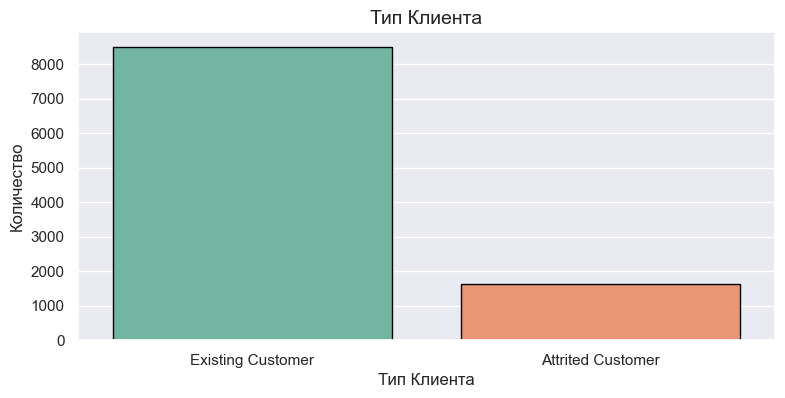

In [87]:
plt.figure(figsize=(9, 4))  
sns.countplot(data=df, x='Attrition_Flag', palette="Set2", edgecolor='black')
plt.title("Тип Клиента", fontsize=14)
plt.xlabel("Тип Клиента")
plt.ylabel("Количество")
plt.show()

Количество активных и закрытых аккаунтов клиентов от общего количетсва 


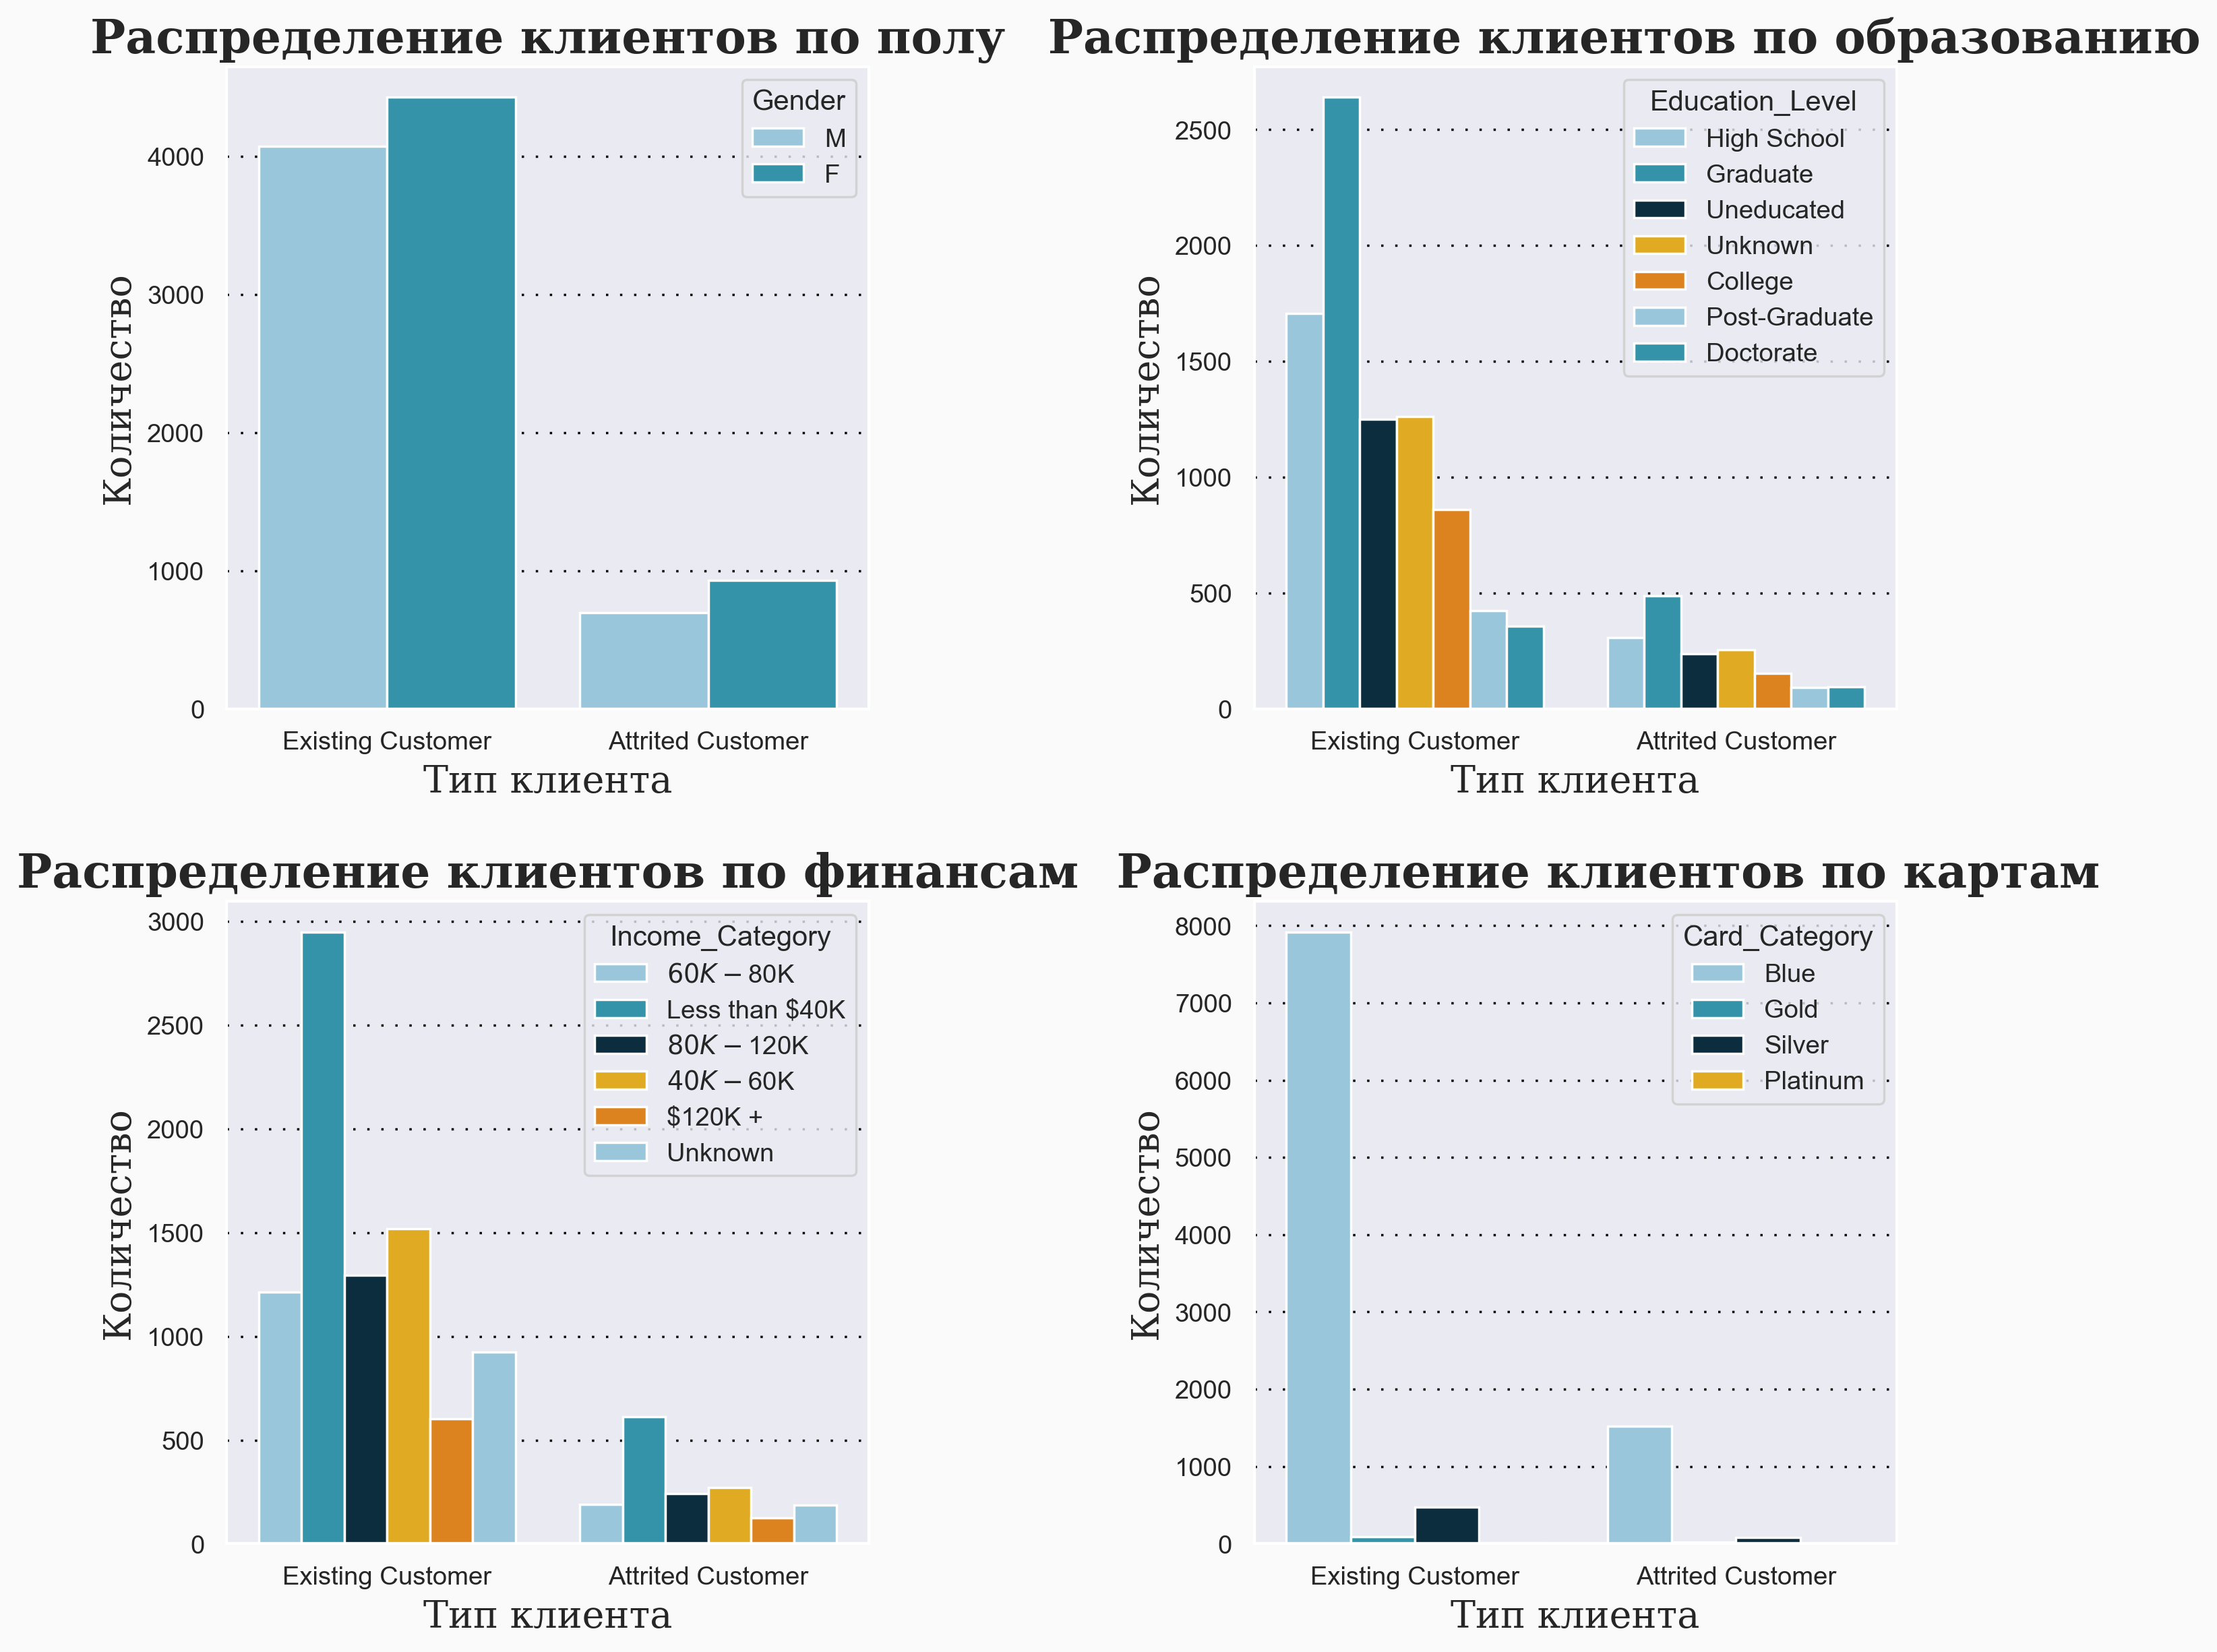

In [88]:
colors = ["#8ecae6","#219ebc","#023047","#ffb703","#fb8500"]
color_palette=["gray","#0e4f66"]
background_color = '#fafafa'

fig = plt.figure(figsize=(60,50), dpi=250)
fig.patch.set_facecolor(background_color) 
gs = fig.add_gridspec(8,8)
gs.update(wspace=.6, hspace=.3)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

ax0 = sns.countplot(ax=ax0, x="Attrition_Flag", hue='Gender', data=df, palette=colors)
ax0.set_ylabel('Количество', fontsize=16, fontfamily='serif')
ax0.set_xlabel('Тип клиента', fontsize=16, fontfamily='serif')
ax0.set_title('Распределение клиентов по полу', fontfamily='serif', fontsize=20, fontweight='bold', loc='center')
ax0.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))


ax1 = sns.countplot(ax=ax1, x="Attrition_Flag", hue='Education_Level', data=df, palette=colors)
ax1.set_ylabel('Количество', fontsize=16, fontfamily='serif')
ax1.set_xlabel('Тип клиента', fontsize=16, fontfamily='serif')
ax1.set_title('      Распределение клиентов по образованию', fontfamily='serif', fontsize=20, fontweight='bold', loc='center')
ax1.grid(color='black', linestyle=':', axis='y', zorder=0, dashes=(1,5))



ax2 = sns.countplot(ax=ax2, x="Attrition_Flag", hue='Income_Category', data=df, palette=colors)
ax2.set_ylabel('Количество', fontsize=16, fontfamily='serif')
ax2.set_xlabel('Тип клиента', fontsize=16, fontfamily='serif')
ax2.set_title('Распределение клиентов по финансам', fontfamily='serif', fontsize=20, fontweight='bold', loc='center')
ax2.grid(color='black', linestyle=':', axis='y', zorder=0, dashes=(1,5))

ax3 = sns.countplot(ax = ax3, x="Attrition_Flag", hue = 'Card_Category', data=df, palette = colors)
ax3.set_ylabel('Количество', fontsize = 16, fontfamily = 'serif')
ax3.set_xlabel('Тип клиента', fontsize=16, fontfamily='serif')
ax3.set_title('    Распределение клиентов по картам',fontfamily = 'serif', fontsize=20, fontweight = 'bold', loc='center')
ax3.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))



plt.show()

На основе этих диаграмм нельзя сделать четко вывода по поводу оттока клиентов, так как данные практически не отличаются 

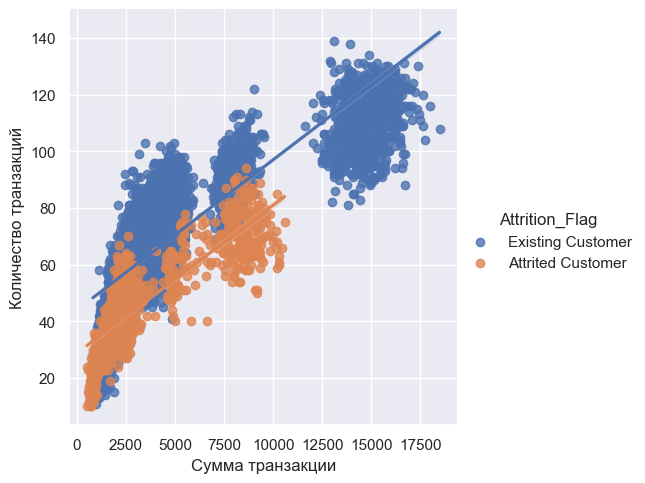

In [89]:
sns.lmplot(x='Total_Trans_Amt',y='Total_Trans_Ct',hue='Attrition_Flag',data=df);
plt.xlabel("Сумма транзакции")
plt.ylabel("Количество транзакций")
plt.show()

Исходя из этого графика можно сделать вывод, что сумма большинства транзакций ушедших клиентов не превышала 11000

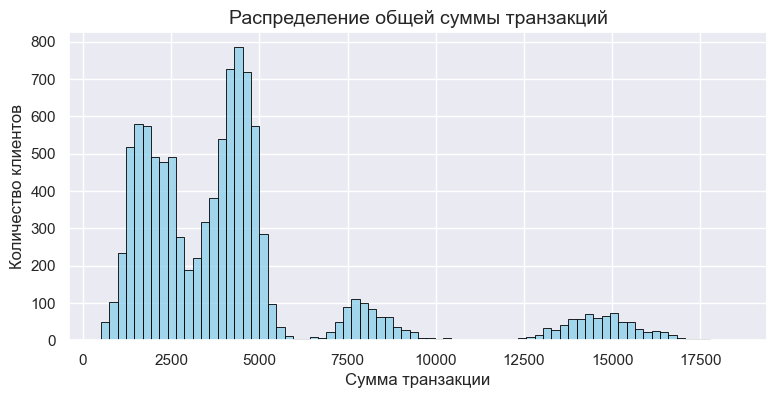

In [90]:
# распределение общей суммы транзакции
plt.figure(figsize=(9, 4))  
sns.histplot(data=df, x='Total_Trans_Amt', color='skyblue', edgecolor='black') 
plt.title("Распределение общей суммы транзакций", fontsize=14)
plt.xlabel("Сумма транзакции")
plt.ylabel("Количество клиентов")
plt.show()

In [121]:
import plotly.express as px

# Создаем гистограмму в Plotly Express
fig = px.histogram(df, x="Total_Trans_Amt", color="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group', color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.update_xaxes(title_text='Сумма транзакции', title_font=dict(size=18))

fig.update_yaxes(title_text='Количество клиентов', title_font=dict(size=18))

# Отображаем график
fig.show()



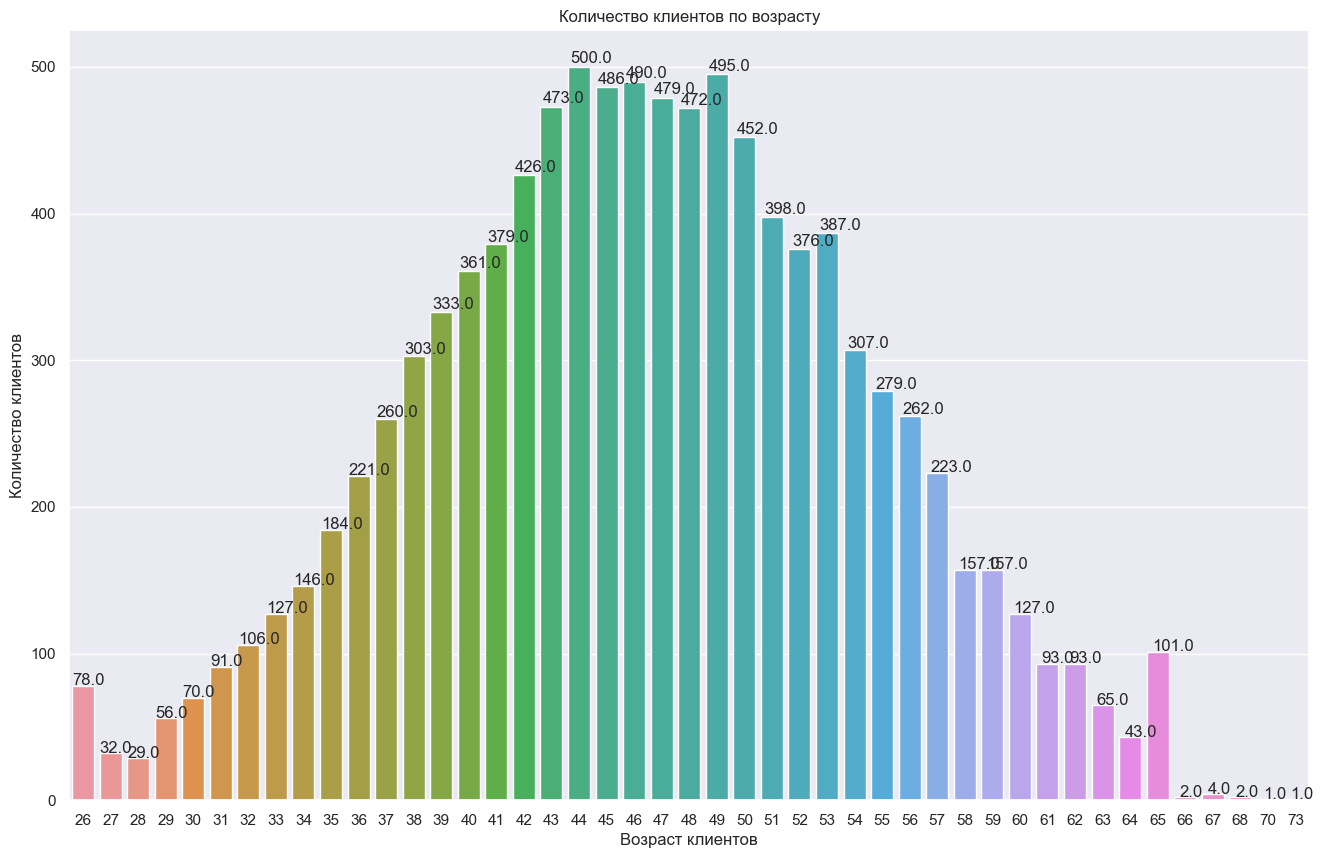

In [91]:
#Количество клиентов в каждой возрастной группе
plt.figure(figsize = (16, 10))
plt.title('Количество клиентов по возрасту')
ax = sns.countplot(data=df, x='Customer_Age')
plt.xlabel('Возраст клиентов')
plt.ylabel('Количество клиентов')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Наибольшее количество банковских клиентов в возрасте от 42 до 50 лет.
Наибольшее количество банковских клиентов было в возрасте 44 года - целых 500 человек, а наименьшее количество - в возрасте 70 и 73 лет, всего по 1 человеку."


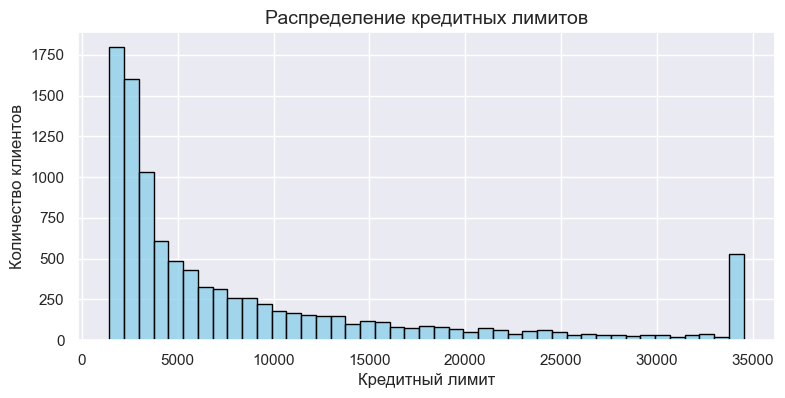

In [92]:
# распределение кредитного лимита
plt.figure(figsize=(9, 4))  
sns.histplot(data=df, x='Credit_Limit', color='skyblue', edgecolor='black')  
plt.title("Распределение кредитных лимитов", fontsize=14)
plt.xlabel("Кредитный лимит")
plt.ylabel("Количество клиентов")
plt.show()


У большинства клиетов кредитный минимальный, но также есть группа людей, у которых кредитный лимит имеет максимальное значение

In [93]:

fig = px.histogram(df, 
                   x="Credit_Limit", 
                   color="Attrition_Flag", 
                   pattern_shape="Attrition_Flag",
                   template='plotly_white',
                   barmode='group',
                   color_discrete_sequence={0: "#f0f87f", 1: "#4696f9"},
                   labels={'Credit_Limit': 'Лимит кредита'},
                   title='Распределение по лимиту кредита с учетом типа клиетов')


fig.update_layout(bargap=0.2)

fig.show()


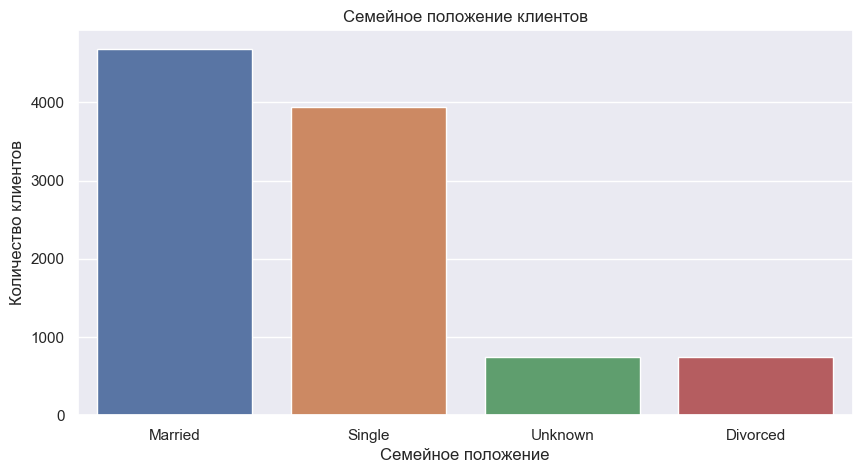

In [94]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Marital_Status'], order=df['Marital_Status'].value_counts().
             sort_values(ascending=False).index)
plt.title('Семейное положение клиентов')
plt.xlabel('Семейное положение')
plt.ylabel('Количество клиентов')
plt.show()

Большинство клиентов находятся в браке

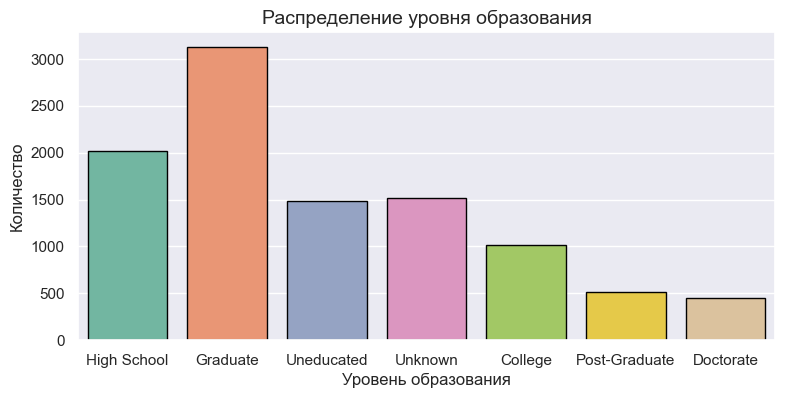

In [95]:
# Уровни образования
plt.figure(figsize=(9, 4))
sns.countplot(data=df, x='Education_Level', palette="Set2", edgecolor = 'black')
plt.title("Распределение уровня образования", fontsize=14)
plt.xlabel("Уровень образования")
plt.ylabel("Количество")
plt.show()

In [122]:
fig = px.histogram(df, x="Education_Level", color="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group', color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)


fig.update_xaxes(title_text='Уровень образования', title_font=dict(size=18))

fig.update_yaxes(title_text='Количество', title_font=dict(size=18))

fig.show()

Gender
F    5358
M    4769
Name: count, dtype: int64


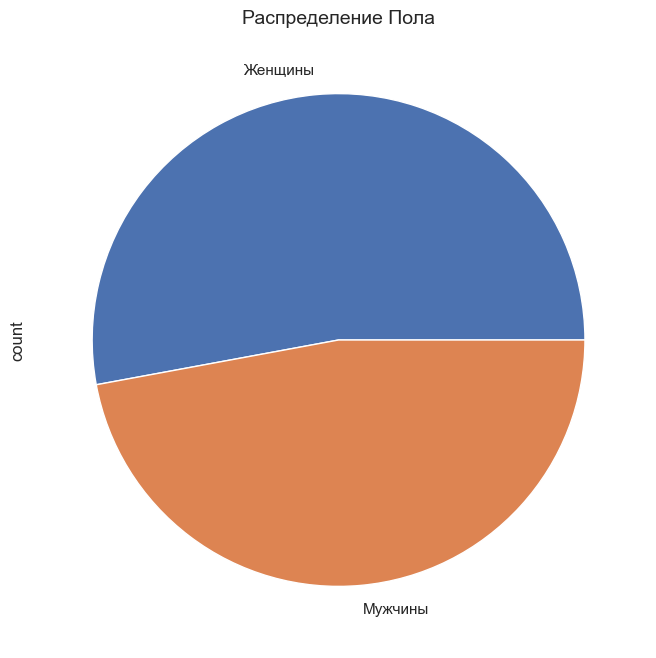

In [96]:
print(df.Gender.value_counts())
plt.figure(figsize=(10, 8))
df.Gender.value_counts().plot(kind='pie', labels=["Женщины", "Мужчины"])
plt.title("Распределение Пола", fontsize=14)
plt.show()

In [116]:
fig = px.histogram(df, 
                   x="Gender", 
                   color="Attrition_Flag", 
                   pattern_shape="Attrition_Flag",
                   template='plotly_white', 
                   barmode='group',
                   color_discrete_sequence=["#f0f87f", "#4696f9"],
                   labels={'Gender': 'Пол'})

# Обновляем параметры layout
fig.update_layout(bargap=0.2)

# Показываем график
fig.show()

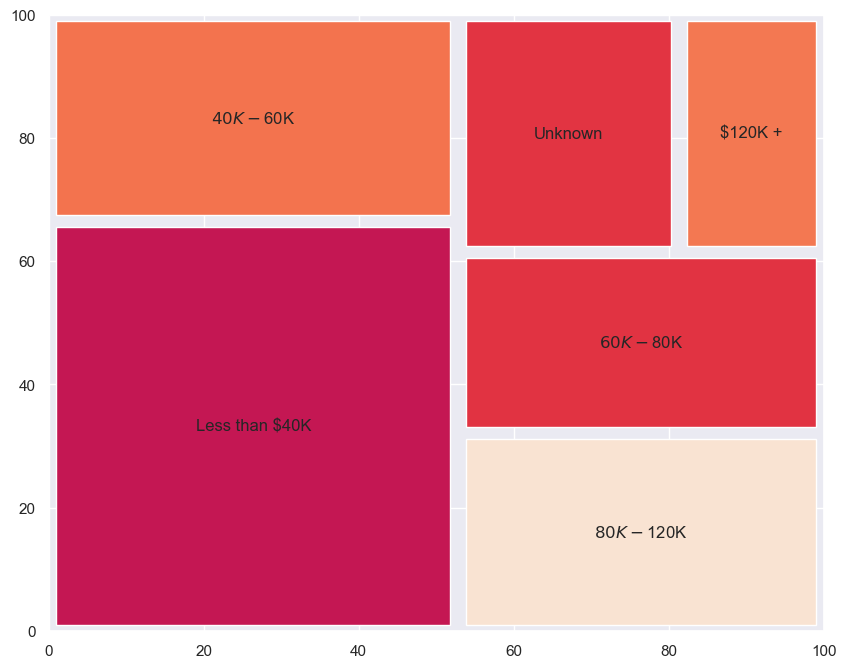

In [97]:
#Категории дохода
import squarify 
labels = df.Income_Category.value_counts().index
data = df.Income_Category.value_counts().values
plt.figure(figsize=(10,8))
squarify.plot(sizes = data, label = labels, pad = True)
plt.show()
plt.close()

In [124]:
fig = px.histogram(df, x="Income_Category", color="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group', color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.update_xaxes(title_text='Категория дохода', title_font=dict(size=18))

fig.update_yaxes(title_text='Количество клиентов', title_font=dict(size=18))

fig.show()


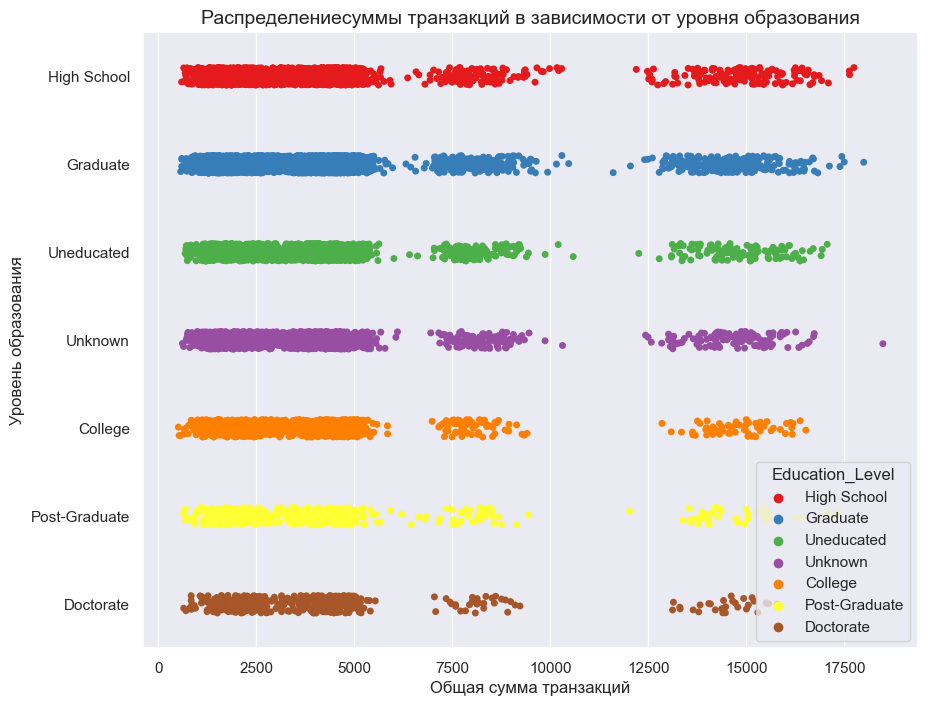

In [98]:
sns.set_style("darkgrid")

plt.figure(figsize=(10,8))
sns.stripplot(data=df, x="Total_Trans_Amt", y="Education_Level", hue="Education_Level", palette="Set1")

plt.title("Распределениесуммы транзакций в зависимости от уровня образования", fontsize=14)
plt.xlabel("Общая сумма транзакций")
plt.ylabel("Уровень образования")

plt.show()


Два разрыва в общей сумме транзакции от 5000 - 7000 до 10000-12500 для всех клиентов уровня образования

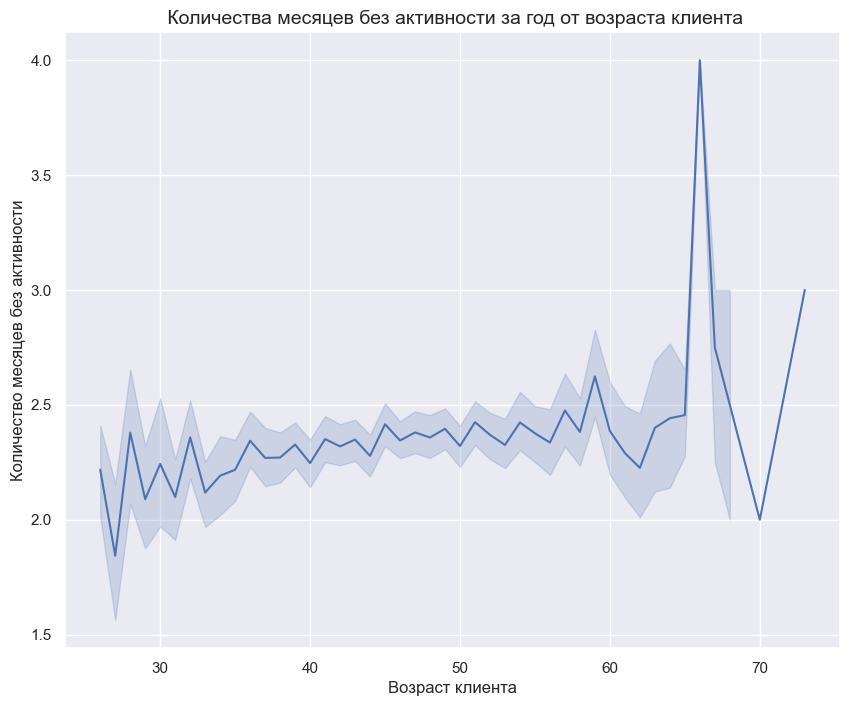

In [99]:
# Сравнение возрастной функции и общей транзакционной связи

plt.figure(figsize=(10, 8))
sns.lineplot(data=df, x='Customer_Age', y='Months_Inactive_12_mon')
plt.title(" Количества месяцев без активности за год от возраста клиента", fontsize=14)
plt.xlabel("Возраст клиента")
plt.ylabel("Количество месяцев без активности")
plt.show()

После 60 лет количество транзакций уменьшается

Количество транзакций в возрасте от 25 до 35 лет находится на пике

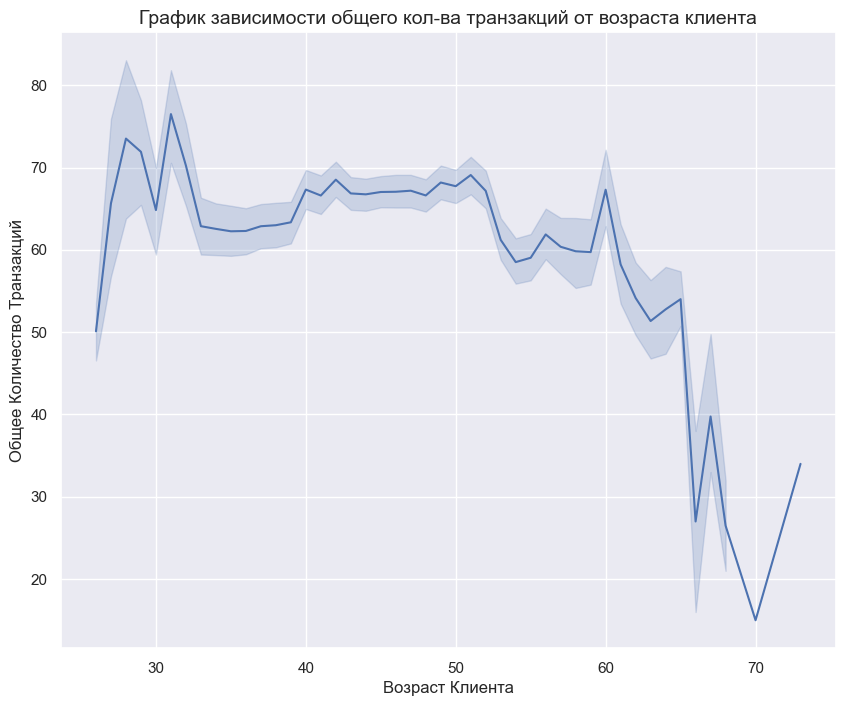

In [100]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=df, x='Customer_Age', y='Total_Trans_Ct')
plt.title("График зависимости общего кол-ва транзакций от возраста клиента", fontsize=14)
plt.xlabel("Возраст Клиента")
plt.ylabel("Общее Количество Транзакций")
plt.show()

По мере увеличения возраста увеличивается количество неактивных месяцев

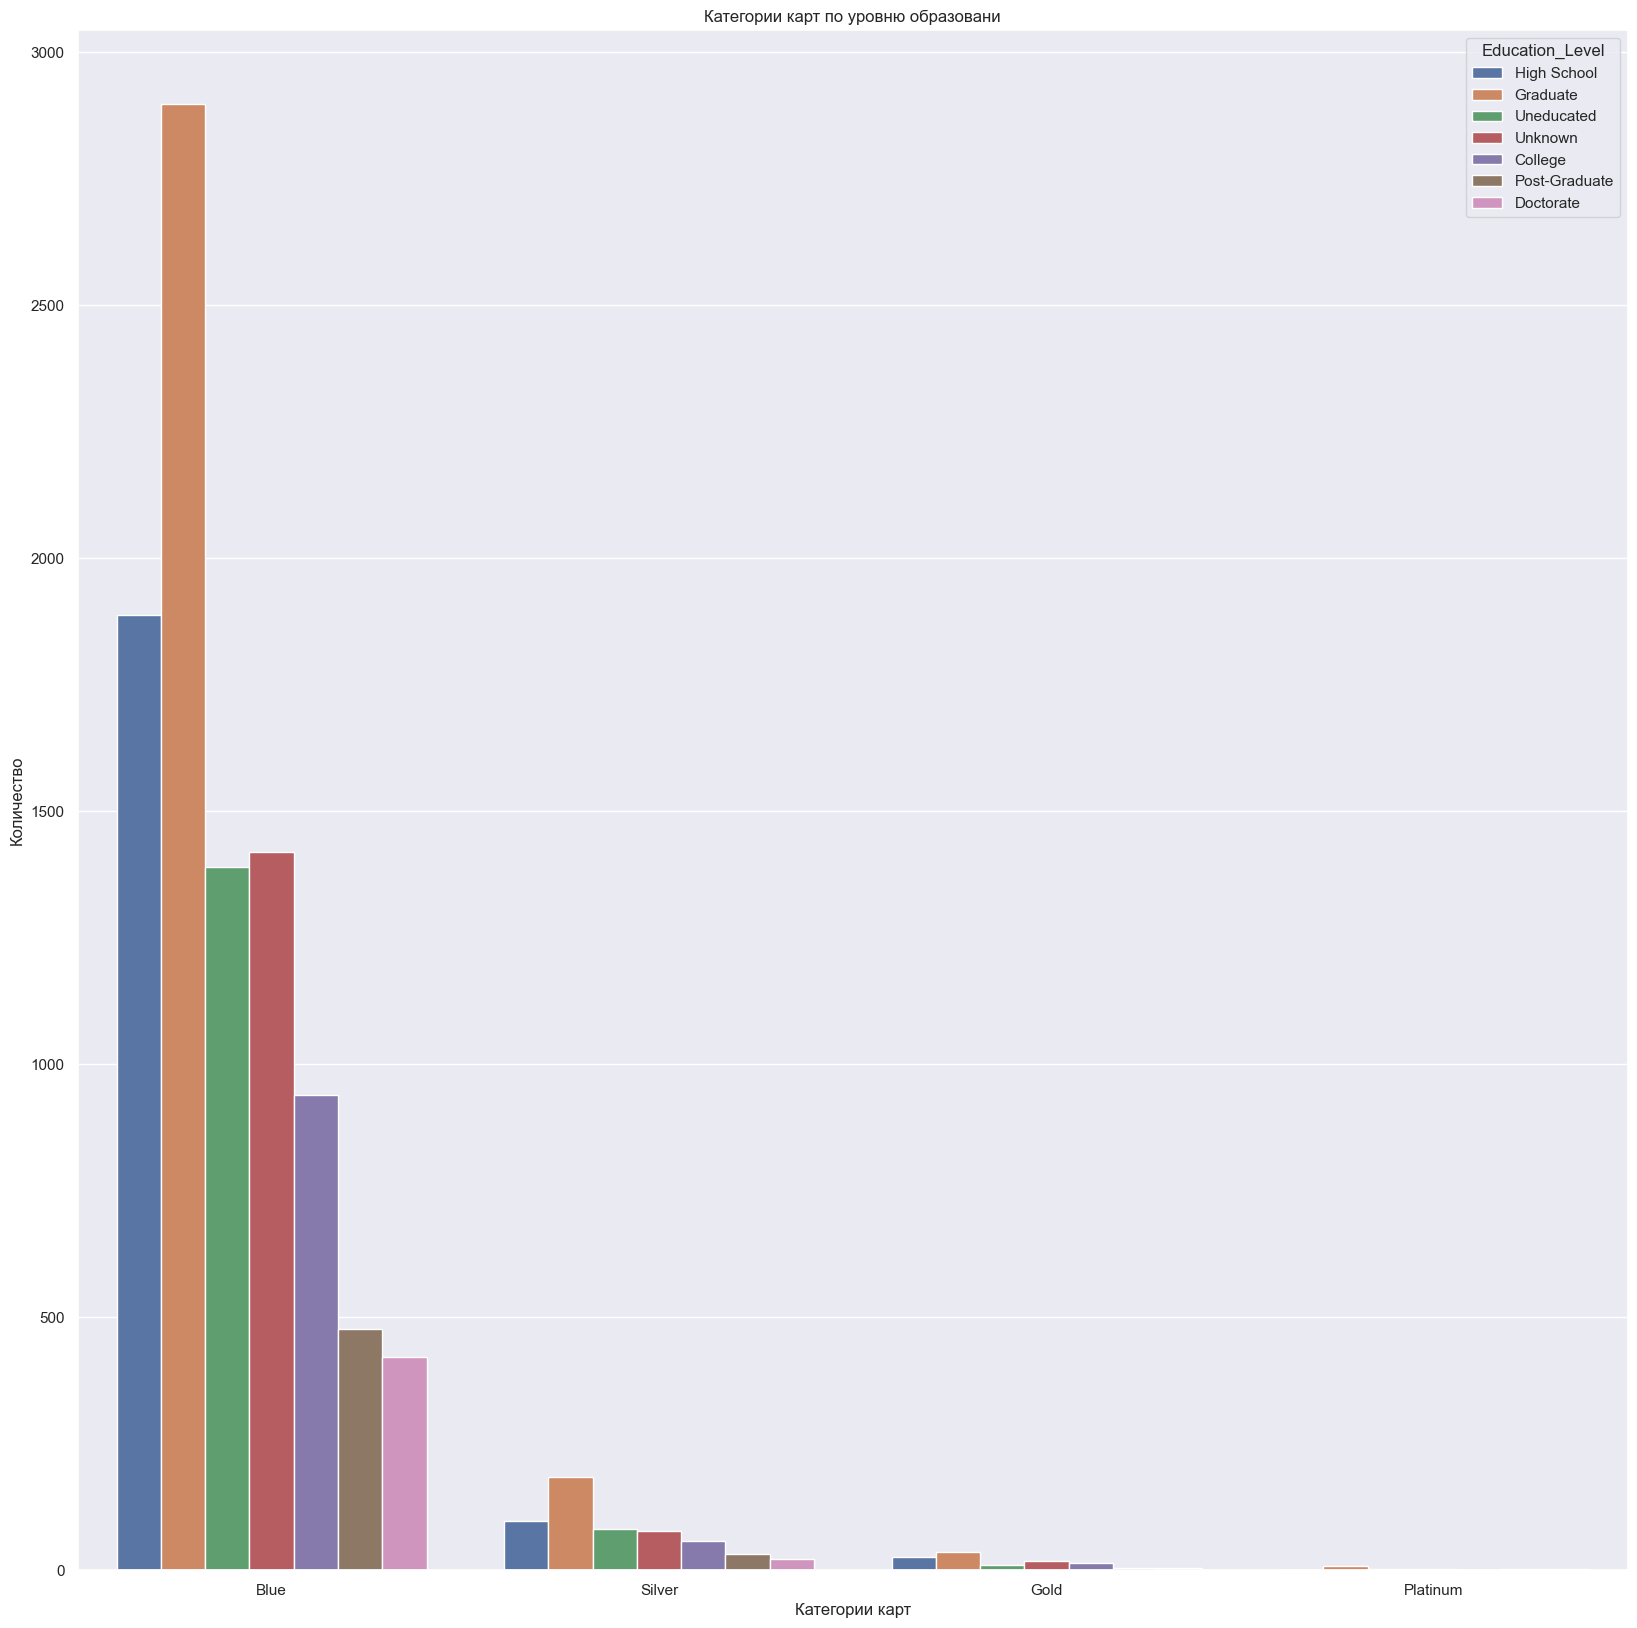

In [101]:
plt.figure(figsize=(20, 20))
sns.countplot(x=df['Card_Category'], hue=df['Education_Level'], order=df['Card_Category'].value_counts().
              sort_values(ascending=False).index)
plt.title("Категории карт по уровню образовани")
plt.xlabel("Категории карт")
plt.ylabel("Количество")
plt.show()

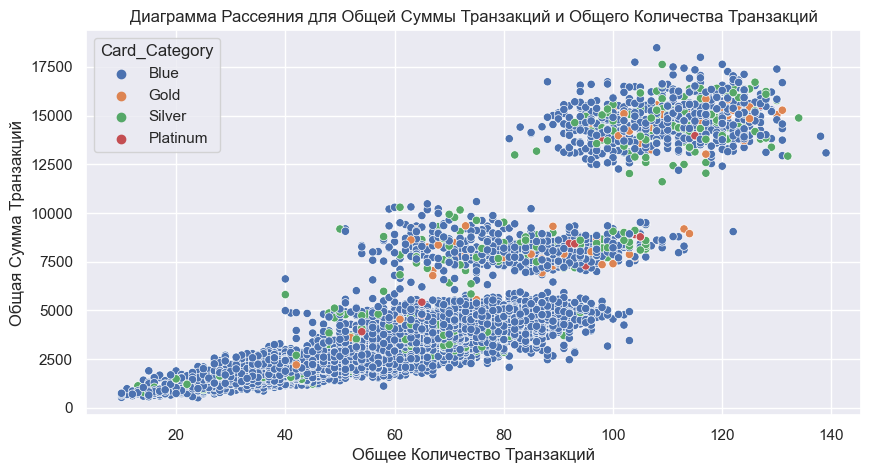

In [102]:

plt.figure(figsize=(10, 5))

sns.scatterplot(y=df['Total_Trans_Amt'], hue=df['Card_Category'], x=df['Total_Trans_Ct'] )

plt.xlabel('Общее Количество Транзакций')
plt.ylabel('Общая Сумма Транзакций')
plt.title('Диаграмма Рассеяния для Общей Суммы Транзакций и Общего Количества Транзакций')
plt.show()

Большинство транзакций проходит с "Blue" категории, ее рассеивание максимально, но с увеличением суммы увеличивается количество "Gold" и "Silver" категорий, а категория "Platinum минимальная в данной диаграмме

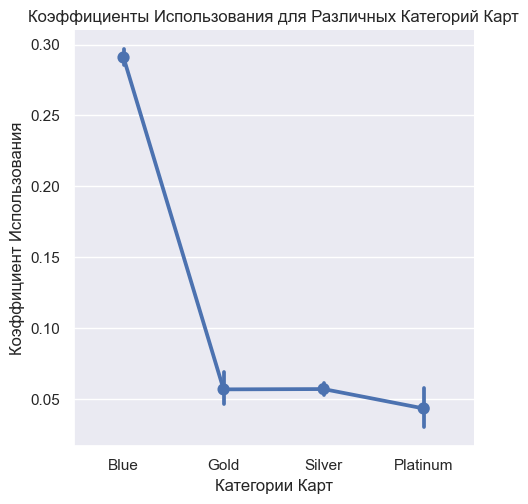

In [103]:
# Тип карты и ее использование 

sns.catplot(data=df, x='Card_Category', y='Avg_Utilization_Ratio' , kind='point')
plt.xlabel('Категории Карт')
plt.ylabel('Коэффициент Использования')
plt.title('Коэффициенты Использования для Различных Категорий Карт')
plt.show()

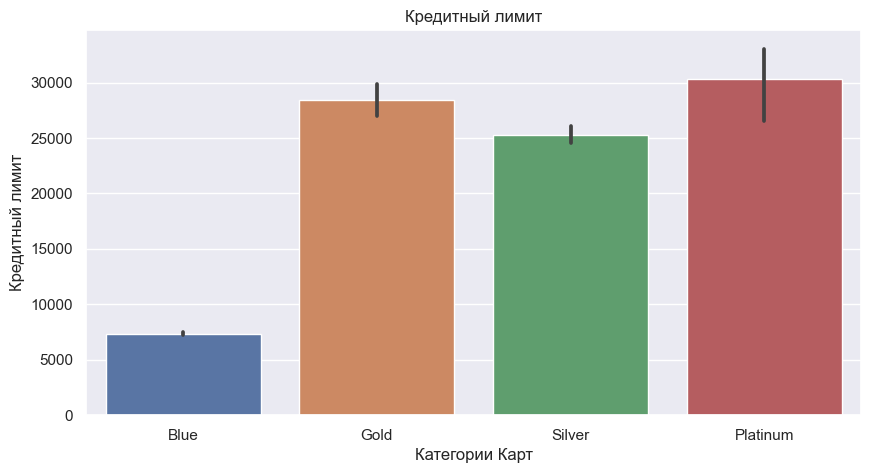

In [104]:
plt.figure(figsize=(10, 5))
sns.barplot(y=df['Credit_Limit'], x=df['Card_Category'])
plt.title("Кредитный лимит")
plt.xlabel('Категории Карт')
plt.ylabel('Кредитный лимит')
plt.show()

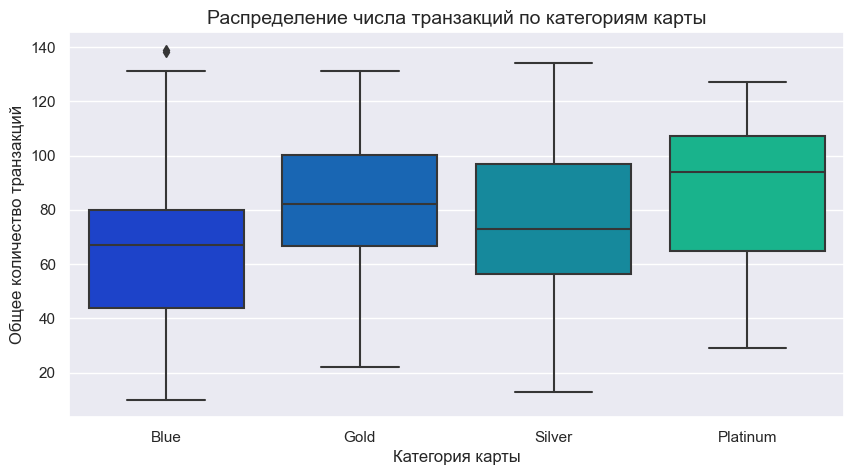

In [125]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Card_Category'], y=df['Total_Trans_Ct'], palette='winter')
plt.title("Распределение числа транзакций по категориям карты", fontsize=14)

plt.xlabel("Категория карты")
plt.ylabel("Общее количество транзакций")

plt.show()

Клиенты с платиновой картой тратят больше по сравнению со всеми категориями других карт.

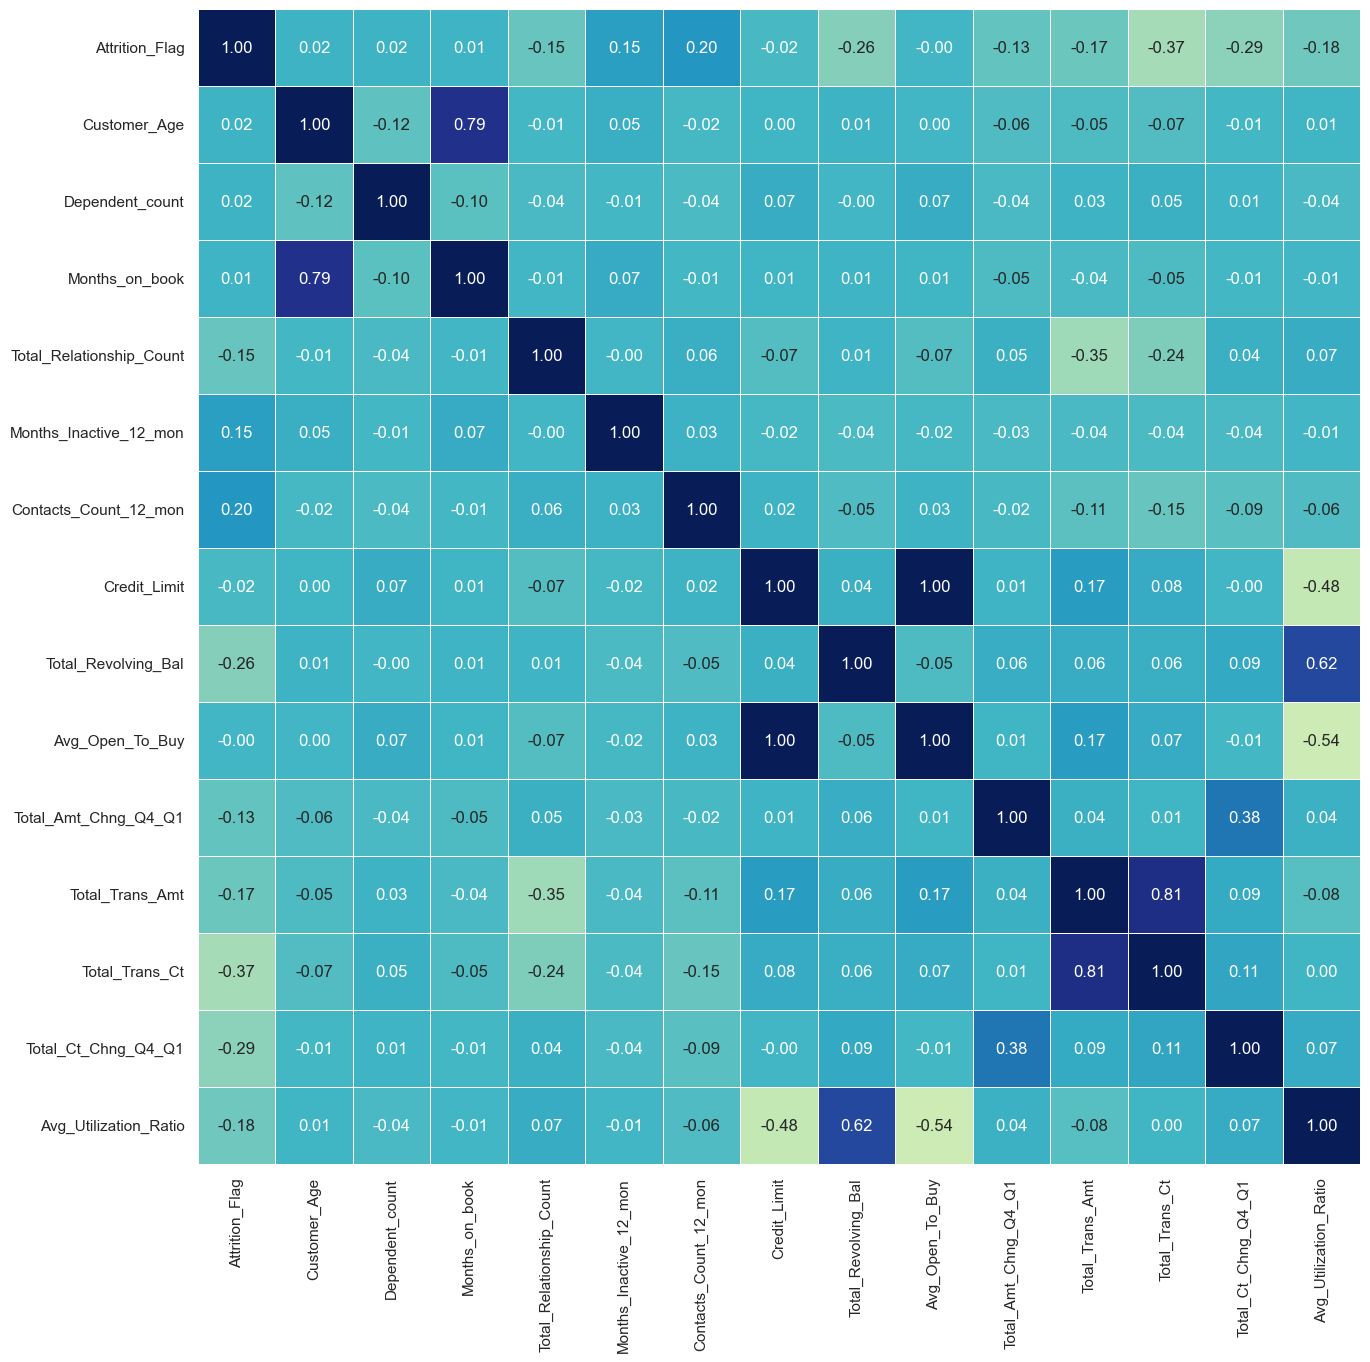

In [111]:

codes = {'Existing Customer': 0, 'Attrited Customer': 1}

data_clean = df.copy()

data_clean['Attrition_Flag'] = data_clean['Attrition_Flag'].map(codes).astype(int)

data_clean = data_clean.select_dtypes(include=[int, float])

sns.set(rc={"figure.figsize": (15, 15)})

sns.heatmap(
    data_clean.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()


Credit Limit и Average Open to Buy имеют 100% коллинеарность

Месяцы по книге и возрасту клиента имеют довольно сильную корреляцию

Average Utilization Ration и Total Revolving Balance немного коррелируют

Attrition Flag не имеет сильной корреляции ни с одной из числовых переменных, но есть небольшая зависимость с Contacts_Count_12_mon и Months_Inactive_12_mon

Customer Churnв не коррелирует с возрастом клиента, количеством иждивенцев, месяцами в книге, открытым для покупки, кредитным лимитом, мы удалим их из набора данных

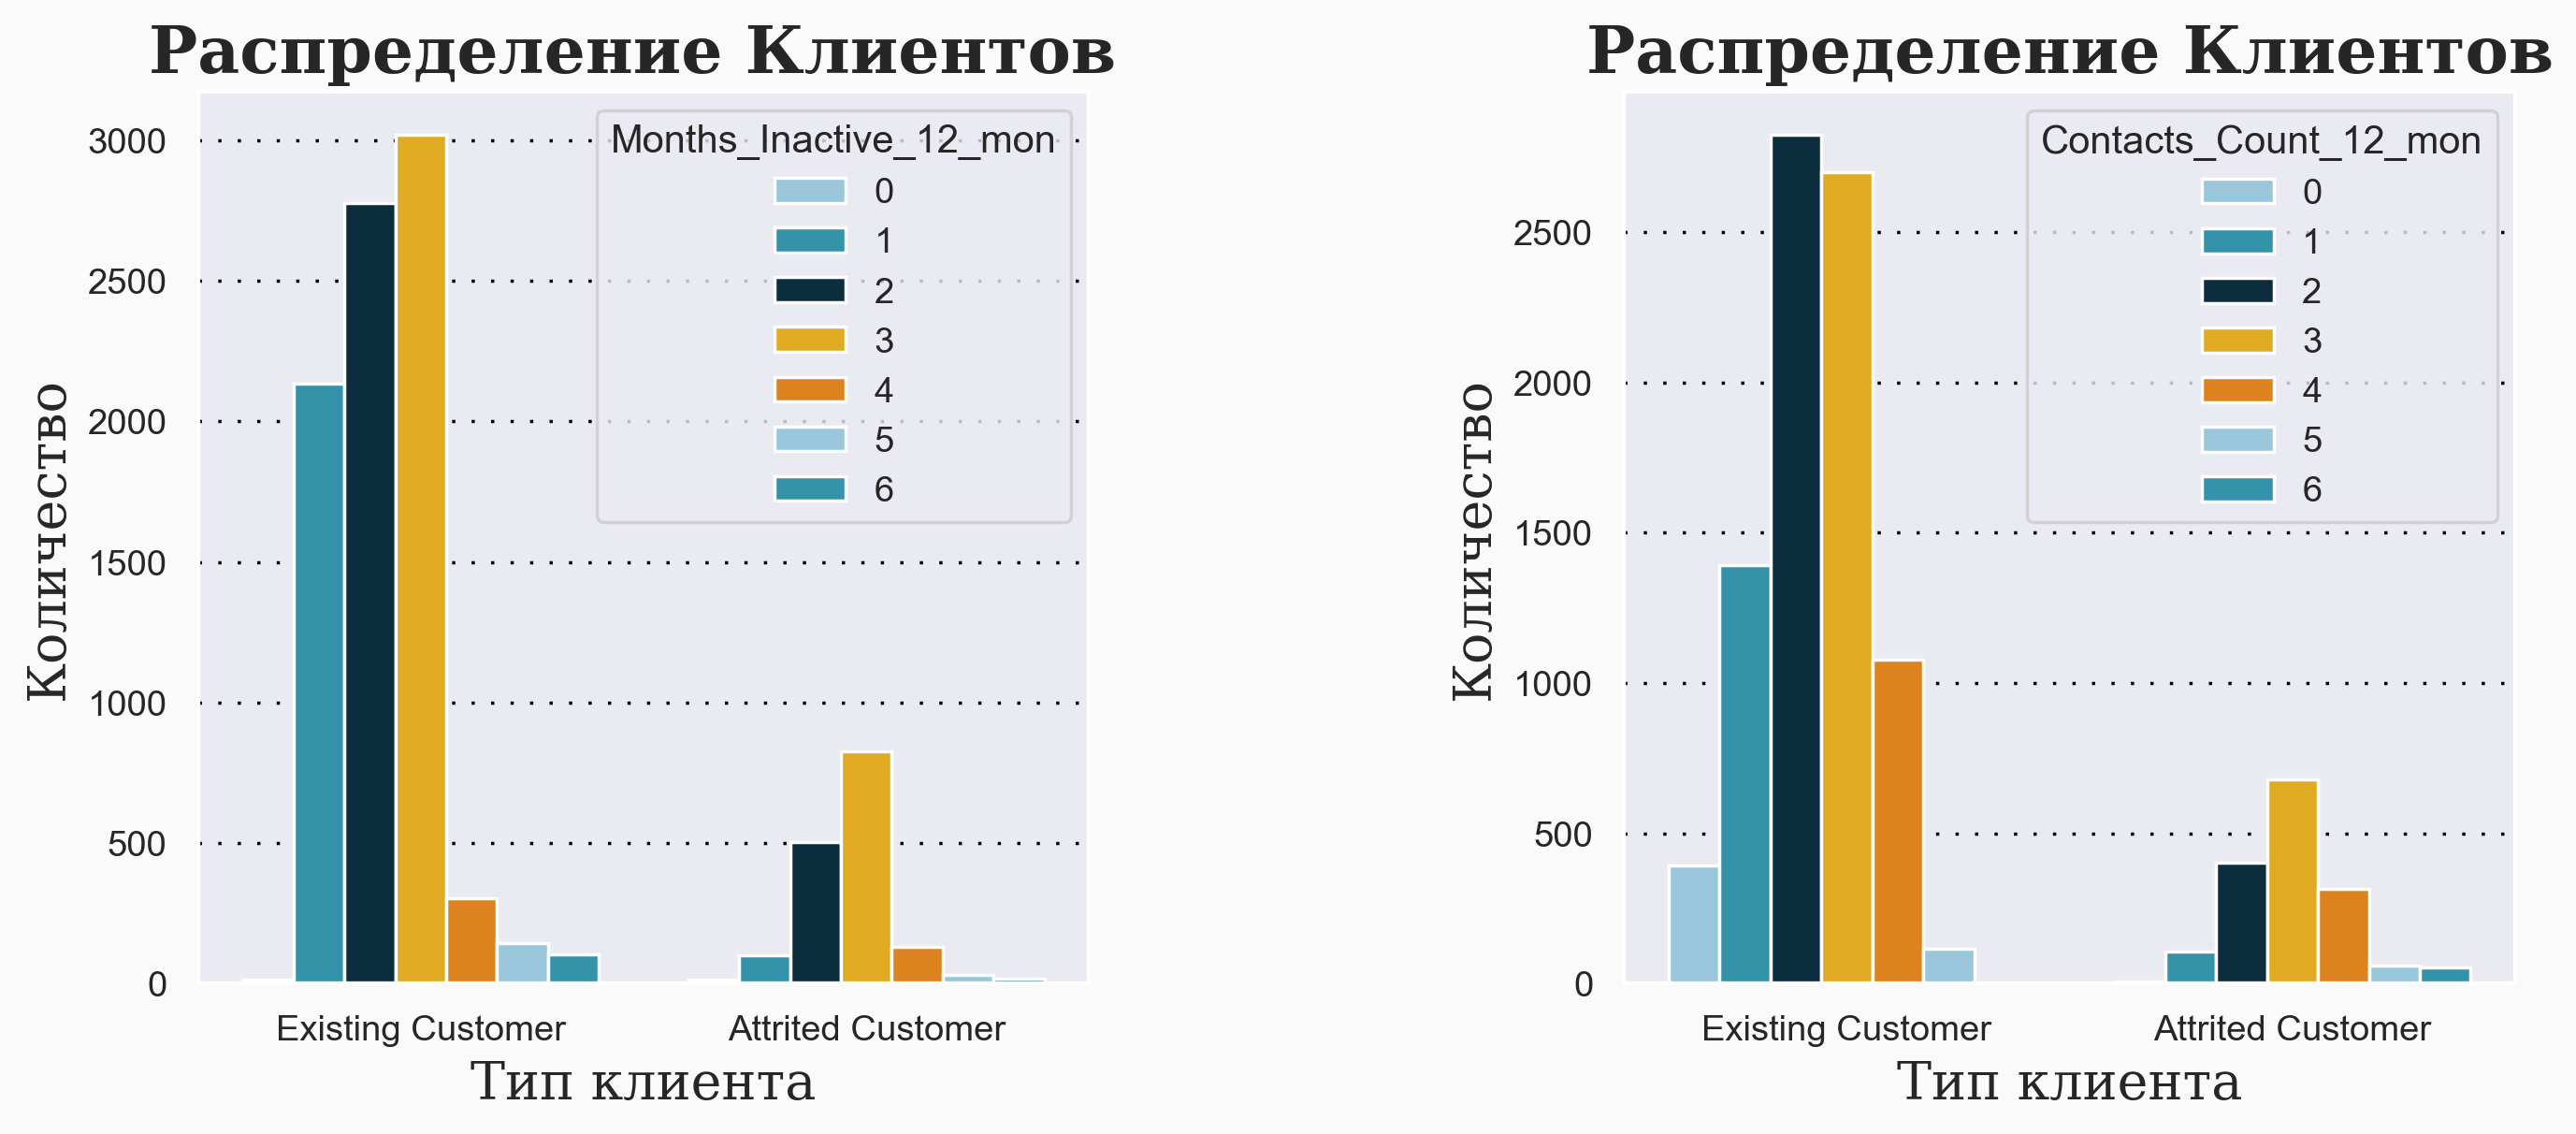

In [137]:
colors = ["#8ecae6","#219ebc","#023047","#ffb703","#fb8500"]
color_palette=["gray","#0e4f66"]
background_color = '#fafafa'

fig = plt.figure(figsize=(60,50), dpi=250)
fig.patch.set_facecolor(background_color) 
gs = fig.add_gridspec(8,8)
gs.update(wspace=.6, hspace=.3)


ax2 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


ax2 = sns.countplot(ax=ax2, x="Attrition_Flag", hue='Months_Inactive_12_mon', data=df, palette=colors)
ax2.set_xlabel('Тип клиента', fontsize=16, fontfamily='serif')
ax2.set_ylabel('Количество', fontsize=16, fontfamily='serif')
ax2.set_title('Распределение Клиентов ', fontfamily='serif', fontsize=20, fontweight='bold', loc='center')
ax2.grid(color='black', linestyle=':', axis='y', zorder=0, dashes=(1,5))

ax1 = sns.countplot(ax=ax1, x="Attrition_Flag", hue='Contacts_Count_12_mon', data=df, palette=colors)
ax1.set_xlabel('Тип клиента', fontsize=16, fontfamily='serif')
ax1.set_ylabel('Количество', fontsize=16, fontfamily='serif')
ax1.set_title('Распределение Клиентов', fontfamily='serif', fontsize=20, fontweight='bold', loc='center')
ax1.grid(color='black', linestyle=':', axis='y', zorder=0, dashes=(1,5))

In [108]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile.to_file(output_file='отчет.html')  


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 141.37it/s]


Общий вывод:

На основе визуализаций, можно сделать вывод, что отток клиентов из банка мог произойти по причине частого обращения "потерянных клинтов" в банк( на графике выше видно, что они обрашись в банк около 6 раз,что выше чем у действующих клиентов).Также есть ряд других замечаний:

Высокая доля клиентов, у которых произошел покинули банк, состоит в браке (43,6%), за которыми следуют одинокие (41,1%) по сравнению с разведенными (7,4%) и неизвестными (7,9%). Семейное положение указанных клиентов сильно сгруппировано по статусу женатых и одиноких

Ушедшие клиенты высокообразованны - высокая доляэтих клиентов имеет высшее образование (29,9%), за которым следует аспирантура (18,8%)

Категории ушедших клиентов сильно сконцентрирована вокруг дохода менее 40К, 
далее идет доход в  40 - 60 тысяч , а только в последнюю очередь клиенты с 
120 тысяч+. Я предполагаю, что клиенты с более высоким доходом вряд ли откажутся от услуг банка, чем клиенты с низким доходом.

Чем больше чем больше тратят ежегодно, тем больше вероятностью останутся клиенты.

После 2-3 месяцев бездействия клиенты с большей вероятностью уйдут.

Чем выше кредитный лимит, тем больше вероятность того, что клиенты останутся.

В случае распределение по возрасту на самом деле не имеет значения, потому что кластеры в значительной степени перекрываются.

Почти все клиенты использовали свои карты менее 100 раз.

Замечание: Приведенные выше цифры показывают, что каждая категория не может быть использована отдельно в качестве фактора для принятия решения о оттоке клиентов. Замужняя женщина с более высоким доходом и образованием имеет другую демографию, чем одинокая женщина со средним доходом и образованием. Таким образом, нам нужно будет взвесить все эти функции, чтобы в дальнейшем построить модель.